# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv")

total_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [2]:
# # Obtener las dimensiones
total_data.shape

(48895, 16)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

int 64 me indica que hay 48895 no nulos, 48895 filas y 16 columnas.

In [4]:
#debemos eliminar duplicados del df
total_data.drop(["id", "name", "host_name", "host_id", "neighbourhood", "last_review"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Esto me deja un data set con variables numericas limpias y elimino variables que creo no necesitar mas adelante.
Las variables categoricas pueden no ser reelevantes para los siguientes analisis.

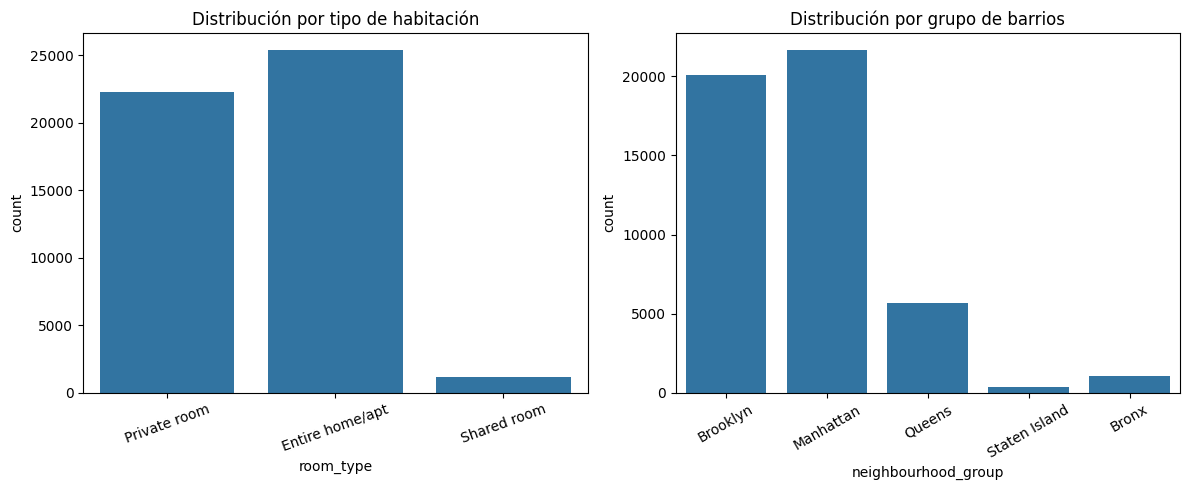

In [5]:
#Comenzamos con las variables categoricas.
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axis[0], data=total_data, x="room_type")
axis[0].set_title("Distribución por tipo de habitación")
axis[0].tick_params(axis='x', rotation=20)
sns.countplot(ax=axis[1], data=total_data, x="neighbourhood_group")
axis[1].set_title("Distribución por grupo de barrios")
axis[1].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()


En el primer gráfico se observa la cantidad de alojamientos por tipo de habitación.
Distribución por grupo de barrios.

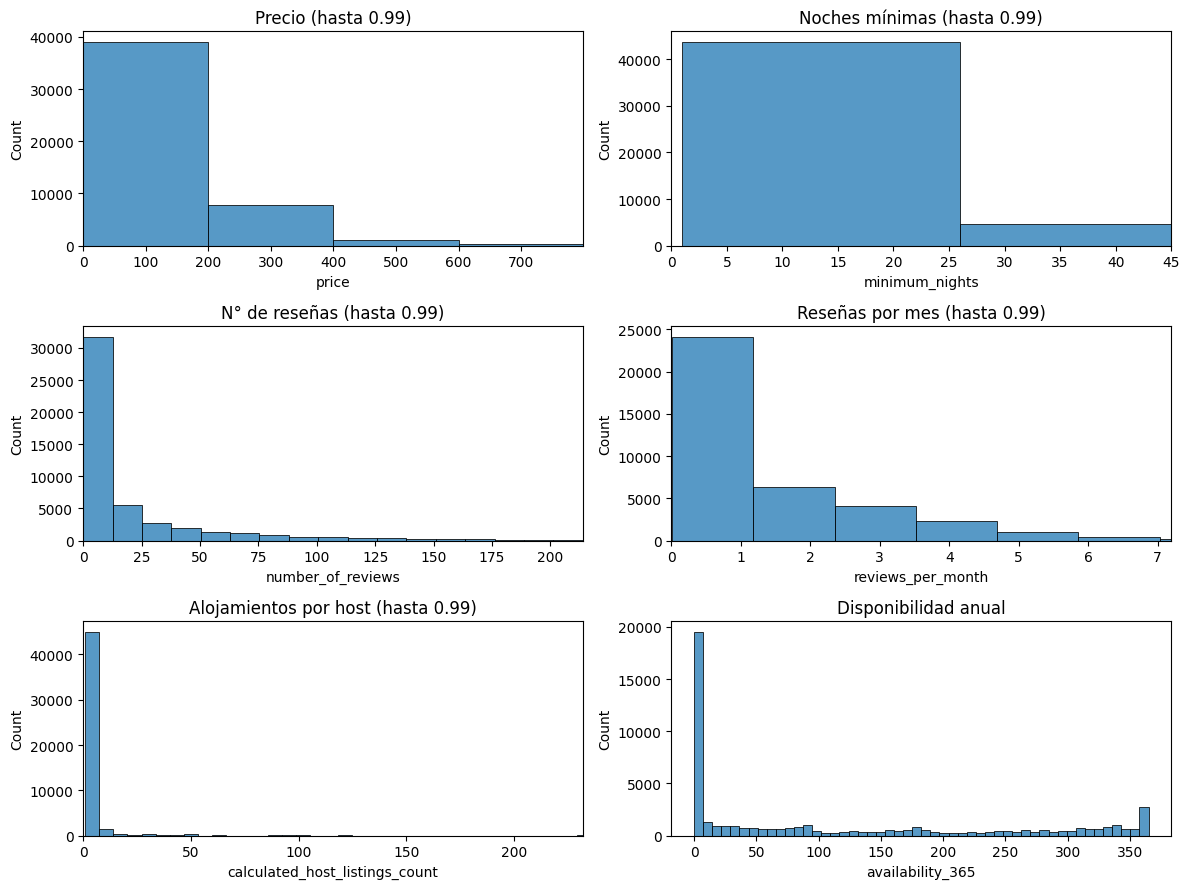

In [6]:
fig, axis = plt.subplots(3, 2, figsize=(12, 9))
# Calcular percentiles una sola vez
price_2 = total_data["price"].quantile(0.99)
nights_2 = total_data["minimum_nights"].quantile(0.99)
reviews_2 = total_data["number_of_reviews"].quantile(0.99)
reviews_per_month_2 = total_data["reviews_per_month"].quantile(0.99)
calculated_host_listings_count_2 = total_data["calculated_host_listings_count"].quantile(0.99)
# Precio
sns.histplot(ax=axis[0, 0], data=total_data, x="price", bins=50)
axis[0, 0].set_xlim(0, price_2)
axis[0, 0].set_title("Precio (hasta 0.99)")
# Noches mínimas
sns.histplot(ax=axis[0, 1], data=total_data, x="minimum_nights", bins=50)
axis[0, 1].set_xlim(0, nights_2)
axis[0, 1].set_title("Noches mínimas (hasta 0.99)")
# Número de reseñas
sns.histplot(ax=axis[1, 0], data=total_data, x="number_of_reviews", bins=50)
axis[1, 0].set_xlim(0, reviews_2)
axis[1, 0].set_title("N° de reseñas (hasta 0.99)")
# Reseñas por mes
sns.histplot(ax=axis[1, 1], data=total_data, x="reviews_per_month", bins=50)
axis[1, 1].set_xlim(0, reviews_per_month_2)
axis[1, 1].set_title("Reseñas por mes (hasta 0.99)")
# Alojamientos por host
sns.histplot(ax=axis[2, 0], data=total_data, x="calculated_host_listings_count", bins=50)
axis[2, 0].set_xlim(0, calculated_host_listings_count_2)
axis[2, 0].set_title("Alojamientos por host (hasta 0.99)")
# Disponibilidad anual (no necesita recorte)
sns.histplot(ax=axis[2, 1], data=total_data, x="availability_365", bins=50)
axis[2, 1].set_title("Disponibilidad anual")
plt.tight_layout()
plt.show()

Precio: Presenta una distribución fuertemente asimétrica a la derecha, con alta concentración en valores bajos y presencia de outliers. Para una visualización  se recortó al percentil 99, confirmando la necesidad de transformaciones previas para modelado.


Noches mínimas: Nos muestra cuántos días te piden quedarte como mínimo. Lo que se puede ver es que muchas casas permiten quedarse muy pocos días. A medida que el número de noches aumenta, aparecen cada vez menos casas. Podemos deducir que la mayoría de los alojamientos están pensados para estancias cortas y solo unos pocos están pensados para estancias muy largas.


Número de reseñas: Muestra cuántas opiniones ha recibido cada casa. Aquí se ve que muchas casas tienen pocas reseñas o ninguna, y solo unas pocas tienen muchísimas.


Reseñas por mes: Nos enseña con qué frecuencia se alquila una casa. La mayoría de las casas casi no reciben reseñas cada mes, lo que significa que no se alquilan muy seguido. En cambio, hay unas pocas casas que reciben muchas reseñas al mes, lo que indica que se alquilan muy a menudo.


Alojamientos por host: Podemos ver cuántas casas tiene cada persona. Lo que se ve claramente es que la mayoría de la gente tiene solo una casa. A partir de ahí, el número de personas baja mucho cuando miramos a quienes tienen muchas casas. Esto nos dice que hay pocos anfitriones grandes que funcionan casi como empresas, y muchos anfitriones normales con un solo alojamiento.

Disponibilidad anual: Muestra cuántos días al año está libre una casa. Algunas casas tienen muy pocos días libres, lo que quiere decir que casi siempre están ocupadas. Otras tienen muchos días libres, incluso casi todo el año, lo que indica que se alquilan poco o casi nada.


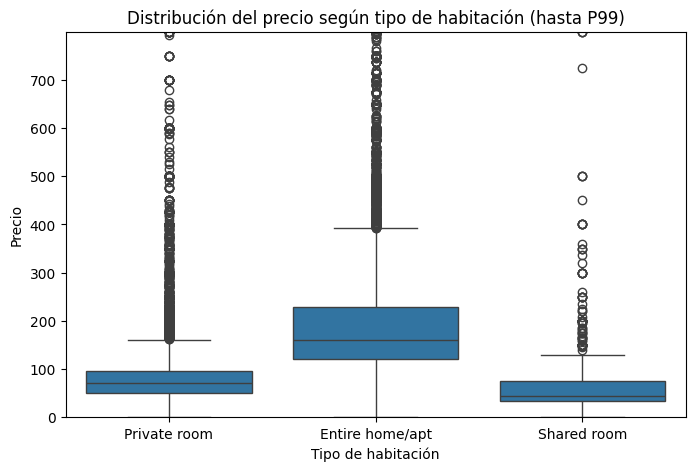

In [7]:
# Calcular el precio, limitamos outliers.
price_3 = total_data["price"].quantile(0.99)
plt.figure(figsize=(8, 5))
sns.boxplot(data=total_data, x="room_type", y="price")
# Limitar eje Y hasta el percentil 99
plt.ylim(0, price_3)
plt.title("Distribución del precio según tipo de habitación (hasta P99)")
plt.xlabel("Tipo de habitación")
plt.ylabel("Precio")
plt.show()



Según lo visto en la graficaEl precio varia dependiendo el tipo de habitación:

Private room: Los precios para las habitaciones privadas son considerablemente más bajos y muestran menos dispersion que la viviendas enteras.

Entire home/apt: Este tipo de habitación presenta los precios mas altos y la mayor variabilidad.

Shared room: Este tipo de habitación es mas economico y con menor variabilidad.

Sabiendo esto podemos sber que el tipo de habitación influye significativamente en el precio.


/tmp/ipykernel_54757/2208713119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=total_data, x="neighbourhood_group", y="price", palette="Set3")


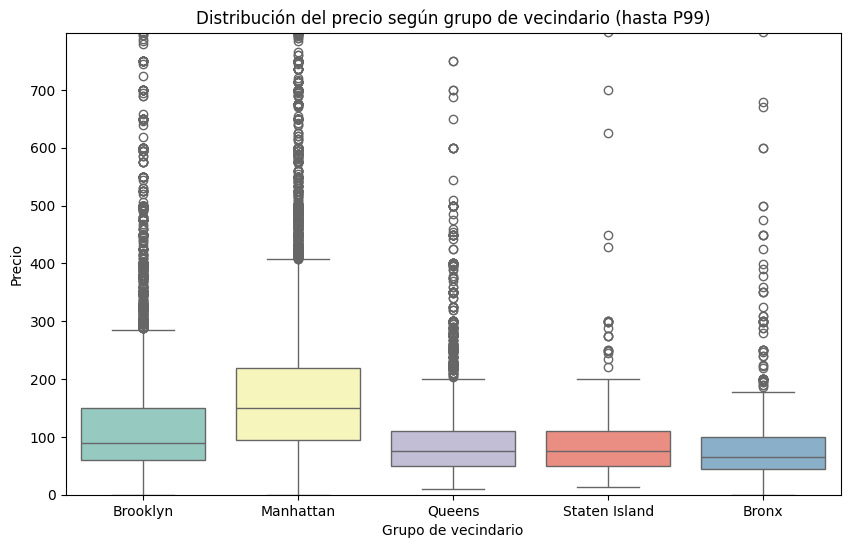

In [8]:
#price + neighbourhood_group
price_4 = total_data["price"].quantile(0.99)
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_data, x="neighbourhood_group", y="price", palette="Set3")
# Limitar eje Y hasta el percentil 99
plt.ylim(0, price_4)
plt.title("Distribución del precio según grupo de vecindario (hasta P99)")
plt.xlabel("Grupo de vecindario")
plt.ylabel("Precio")
plt.show()


 El gráfico nos muestra que existe una variacion considerable en los precios de las propiedades entre los diferentes vecindarios, sienda Manhattan el mas costoso y el Bronx y Staten Island los mas asequibles.

/tmp/ipykernel_54757/2402427082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=total_data, x="room_type", y="minimum_nights", palette="Set2")


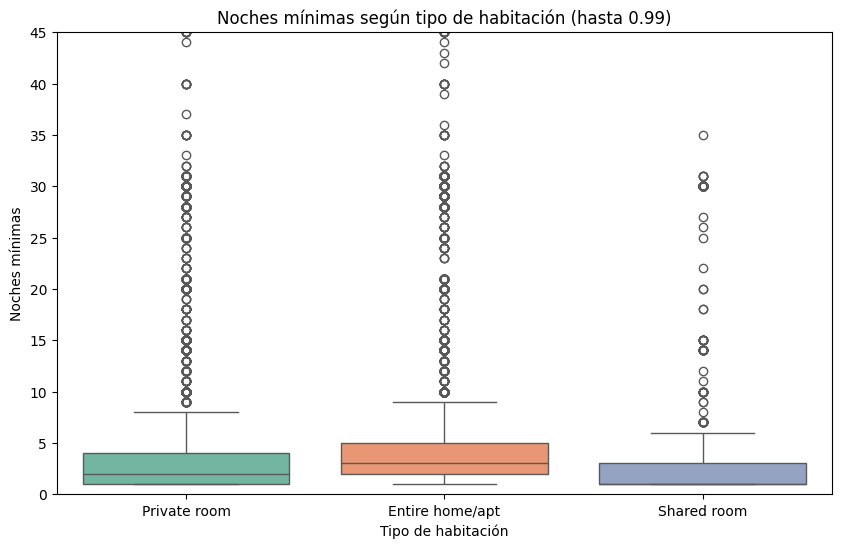

In [9]:
#   minimum_nights + room_type
nights_2 = total_data["minimum_nights"].quantile(0.99)
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_data, x="room_type", y="minimum_nights", palette="Set2")
# Limitar eje Y hasta el percentil 99
plt.ylim(0, nights_2)
plt.title("Noches mínimas según tipo de habitación (hasta 0.99)")
plt.xlabel("Tipo de habitación")
plt.ylabel("Noches mínimas")
plt.show()



Esta gráfica compara las noches mínimas según el tipo de habitación. 

Cada caja representa un tipo distinto de alojamiento y muestra cuántas noches suelen pedir como mínimo.

Se ve que la mayoría de los tipos concentran sus valores en pocas noches, lo que indica que, en general, permiten estancias cortas. Sin embargo, en algunos casos estan planificados para estancias largas.

/tmp/ipykernel_54757/427250794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=total_data, x="room_type", y="minimum_nights", palette="Set2")


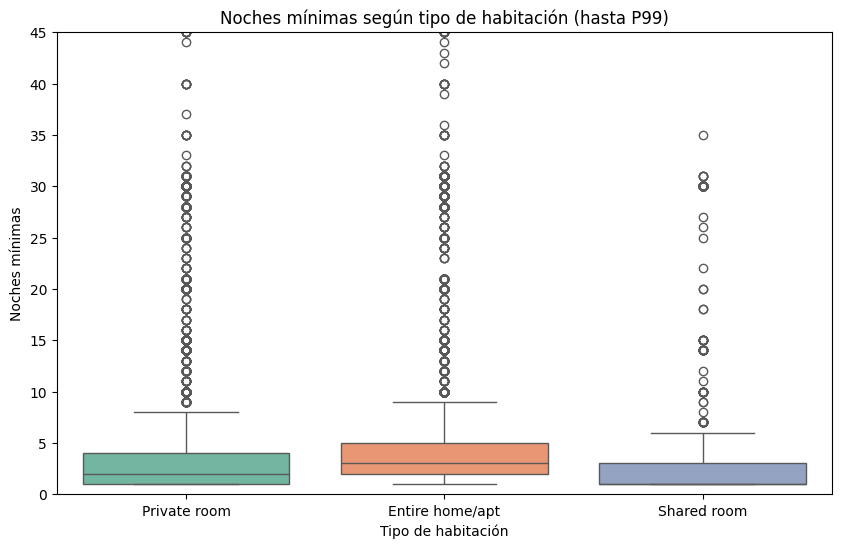

In [10]:
#   minimum_nights + room_type
nights_2 = total_data["minimum_nights"].quantile(0.99)
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_data, x="room_type", y="minimum_nights", palette="Set2")
# Limitar eje Y hasta el percentil 99
plt.ylim(0, nights_2)
plt.title("Noches mínimas según tipo de habitación (hasta P99)")
plt.xlabel("Tipo de habitación")
plt.ylabel("Noches mínimas")
plt.show()


La mayoria de los alojamientos en todas las categorias requieren una estancia minima de una o dos noches, hay otros casos de apartamentos pensados para estancias largas.

/tmp/ipykernel_54757/424031475.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_data, x="room_type", y="number_of_reviews", estimator="mean", palette="Set3", ax=axis[1])


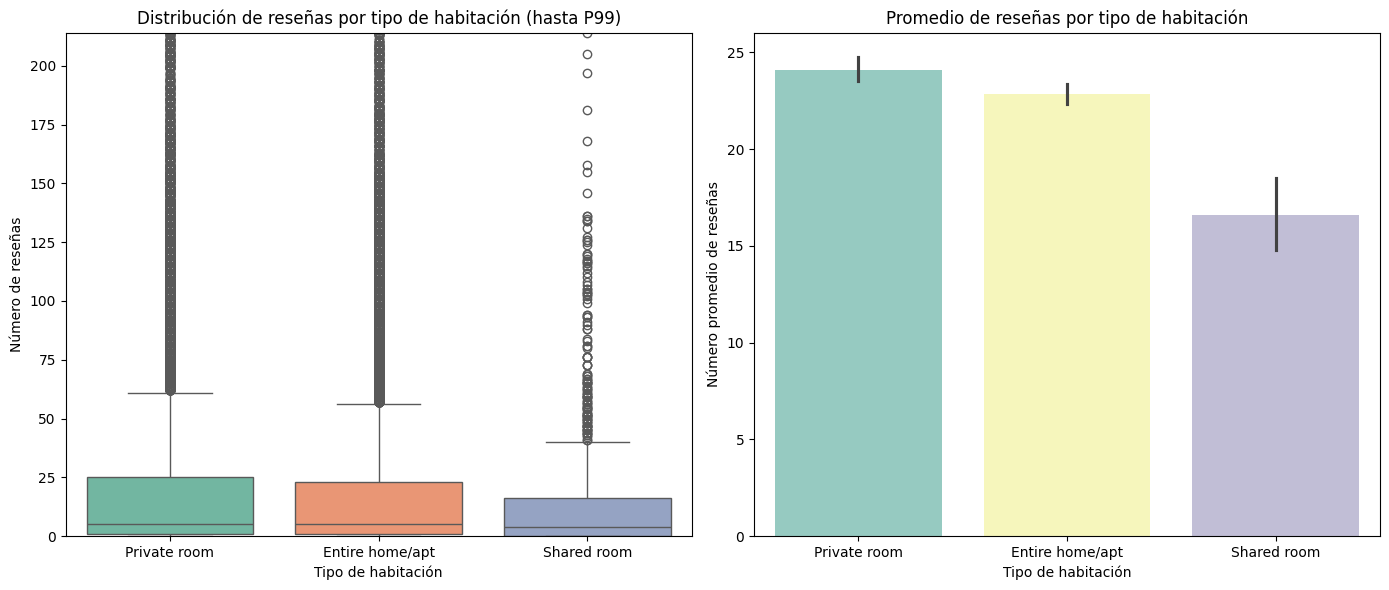

In [11]:
# Calcular 0.99 de number_of_reviews
reviews_a = total_data["number_of_reviews"].quantile(0.99)
fig, axis = plt.subplots(1, 2, figsize=(14, 6))
# Boxplot
sns.boxplot(data=total_data, x="room_type", y="number_of_reviews", hue="room_type", palette="Set2", legend=False, ax=axis[0])
# Limitar eje Y hasta el percentil 99
axis[0].set_ylim(0, reviews_a)
axis[0].set_title("Distribución de reseñas por tipo de habitación (hasta P99)")
axis[0].set_xlabel("Tipo de habitación")
axis[0].set_ylabel("Número de reseñas")
axis[0].tick_params(axis='x')
# Barplot (promedio)
sns.barplot(data=total_data, x="room_type", y="number_of_reviews", estimator="mean", palette="Set3", ax=axis[1])
axis[1].set_title("Promedio de reseñas por tipo de habitación")
axis[1].set_xlabel("Tipo de habitación")
axis[1].set_ylabel("Número promedio de reseñas")
axis[1].tick_params(axis='x')
plt.tight_layout()
plt.show()

Aqui se muestra un analisis donde comparamos precios y receñas.

En el grafico de la izquierda vemos la distribucion de precios por tipo de habitación y el de la derecha la distribucion de reseñas por tipo de habitacion.

/tmp/ipykernel_54757/1661500094.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_data, x="room_type", y="availability_365", estimator="mean", palette="Set3", ax=axis[1])


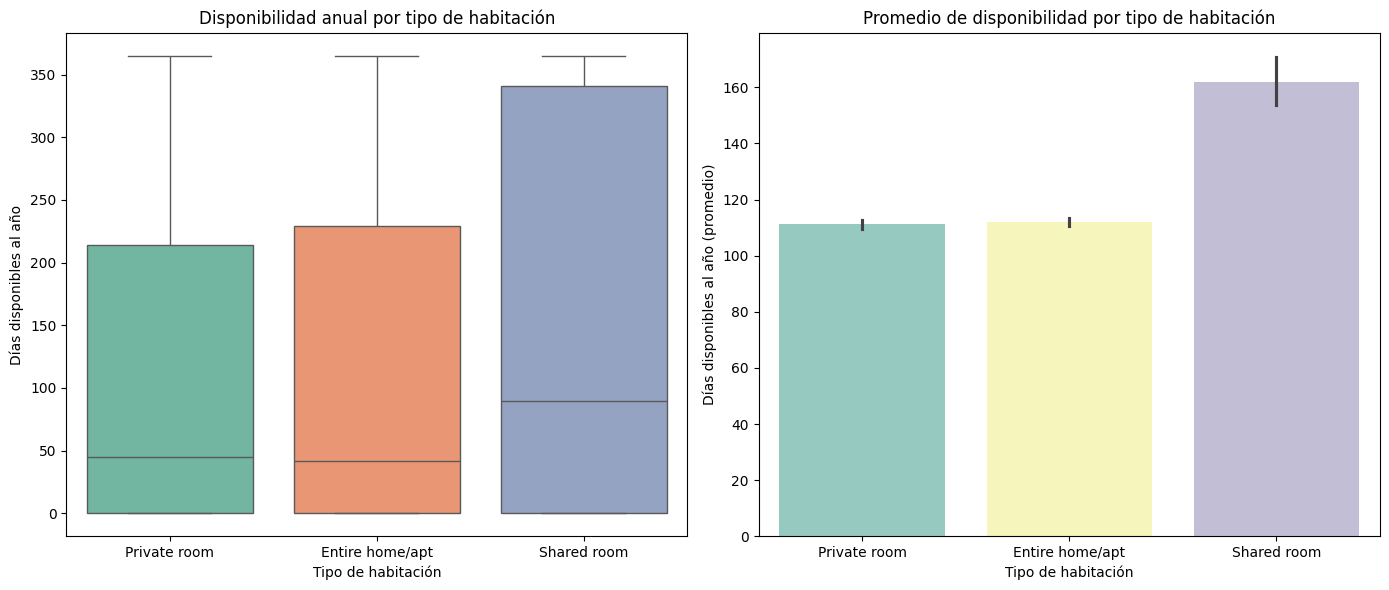

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(14, 6))
# Boxplot
sns.boxplot(data=total_data, x="room_type", y="availability_365", hue="room_type", palette="Set2", legend=False, ax=axis[0])
axis[0].set_title("Disponibilidad anual por tipo de habitación")
axis[0].set_xlabel("Tipo de habitación")
axis[0].set_ylabel("Días disponibles al año")
axis[0].tick_params(axis='x')
# Barplot (promedio)
sns.barplot(data=total_data, x="room_type", y="availability_365", estimator="mean", palette="Set3", ax=axis[1])
axis[1].set_title("Promedio de disponibilidad por tipo de habitación")
axis[1].set_xlabel("Tipo de habitación")
axis[1].set_ylabel("Días disponibles al año (promedio)")
axis[1].tick_params(axis='x')
plt.tight_layout()
plt.show()


Aqui se muestra la disponobilidad anual por tipo de habitacion y el promedio de disponibilidad por tipo de habitacion. La habitación doble es el tipo de habitación con mayor probabilidad representada, mientras que el departamento e el que tiene la menor porbabilidad.

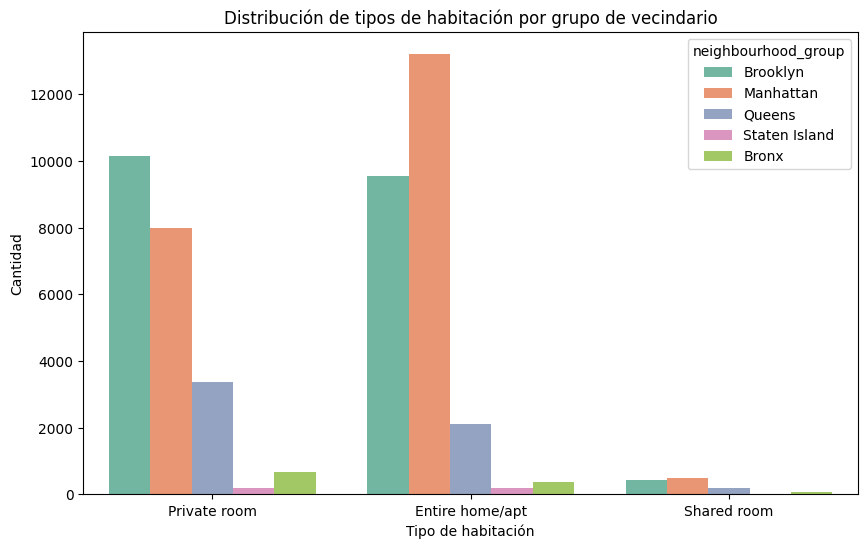

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=total_data, x="room_type", hue="neighbourhood_group", palette="Set2")
plt.title("Distribución de tipos de habitación por grupo de vecindario")
plt.xlabel("Tipo de habitación")
plt.ylabel("Cantidad")
plt.show()


El grafico de barras agrupadas muestra la distribución de los tipos de habitación por grupos de vecindarios; la mayoria de los listados en la plataforma son apartamentos completos o habitaciones privadas concentrados principalmente en Manhattan y Brooklyn.

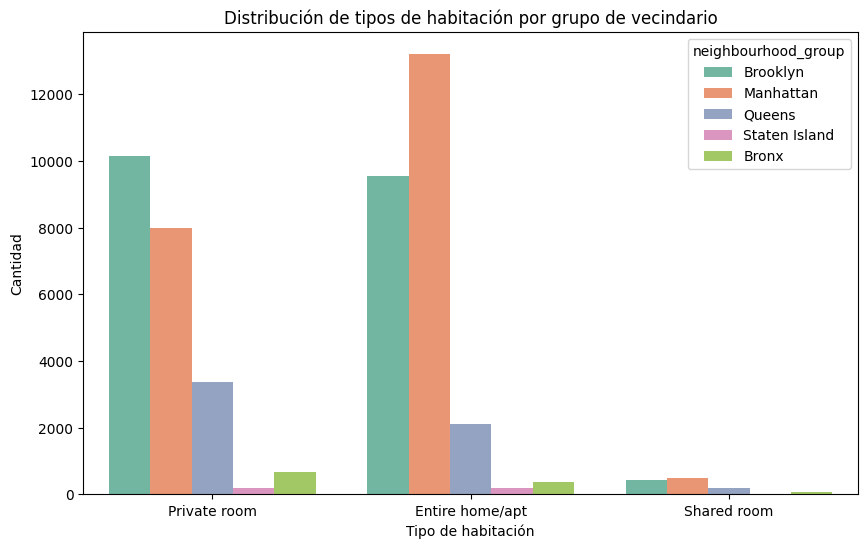

In [14]:
#    Analisis Numerico-numerico
plt.figure(figsize=(10, 6))
sns.countplot(data=total_data, x="room_type", hue="neighbourhood_group", palette="Set2")
plt.title("Distribución de tipos de habitación por grupo de vecindario")
plt.xlabel("Tipo de habitación")
plt.ylabel("Cantidad")
plt.show()


Esta gráfica muestra los tipos de habitación y los separa por grupos de vecindarios usando colores distintos. 

En el eje de abajo están los tipos de habitación y la altura de las barras indica cuántos alojamientos hay de cada tipo. Los colores permiten ver en qué zonas hay más o menos de cada tipo de alojamiento. Al mirar el dibujo se puede entender rápidamente qué tipo de habitación es el más común y cómo cambia su presencia según la zona, por ejemplo si en algunos vecindarios hay más pisos completos y en otros predominan las habitaciones privadas.
Esta grafica indica que la oferta de alquileres en las areas mostradas esta dominada por Brooklyn y Manhattan, y se concentra en dos tipos de alojamientos principales.

In [15]:
# Factorizamos: 

import json

total_data["neighbourhood_group_n"] = pd.factorize(total_data.neighbourhood_group)[0]
total_data["room_type_n"] = pd.factorize(total_data.room_type)[0]

# 2. Guardar reglas de neighbourhood_group en JSON
neighbourhood_group_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"]
    for _, row in total_data[
        ["neighbourhood_group", "neighbourhood_group_n"]
    ].drop_duplicates().iterrows()
}

with open("neighbourhood_group_rules.json", "w") as f:
    json.dump(neighbourhood_group_rules, f)

# 4. Guardar reglas de room_type en JSON
room_type_rules = {
    row["room_type"]: row["room_type_n"]
    for _, row in total_data[["room_type", "room_type_n"]].drop_duplicates().iterrows()}

with open("room_type_rules.json", "w") as f:
    json.dump(room_type_rules, f)

total_data.head()


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1,1
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,1,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,1
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1,1


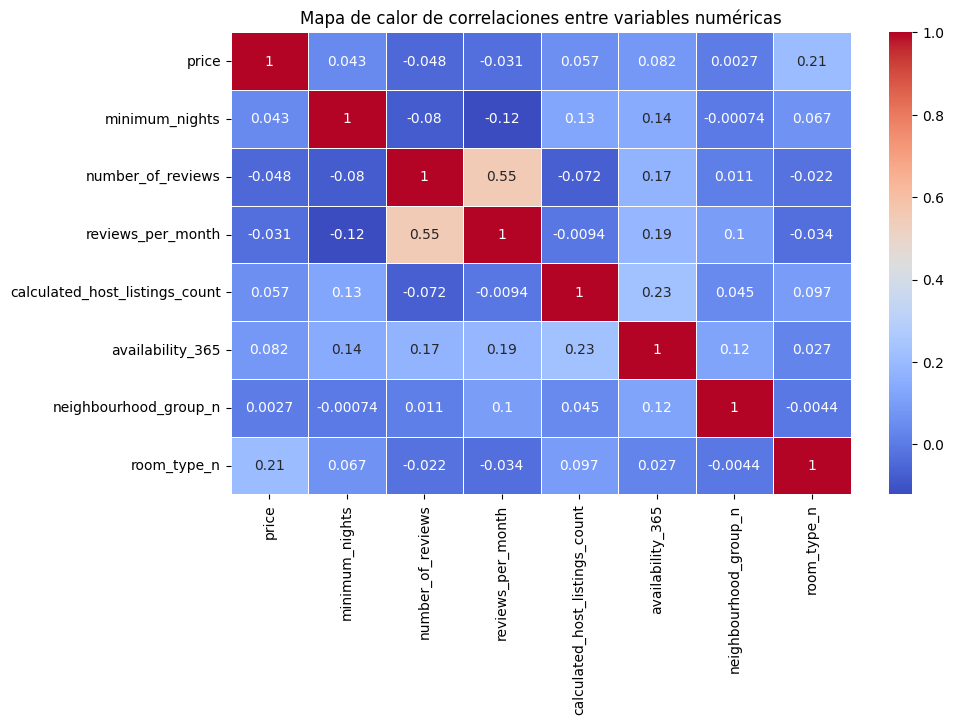

In [16]:
numericas = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count","availability_365","neighbourhood_group_n","room_type_n"]

corr = total_data[numericas].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()


Este grafica resalta las  variables con mas relacion entre si. por ejemplo price pararece tener una relacion debil con minimum_nights ya que el color es muy claro y tiene una correlasion mas estrecha con las variables que se resaltan con recuadros mas oscuros.

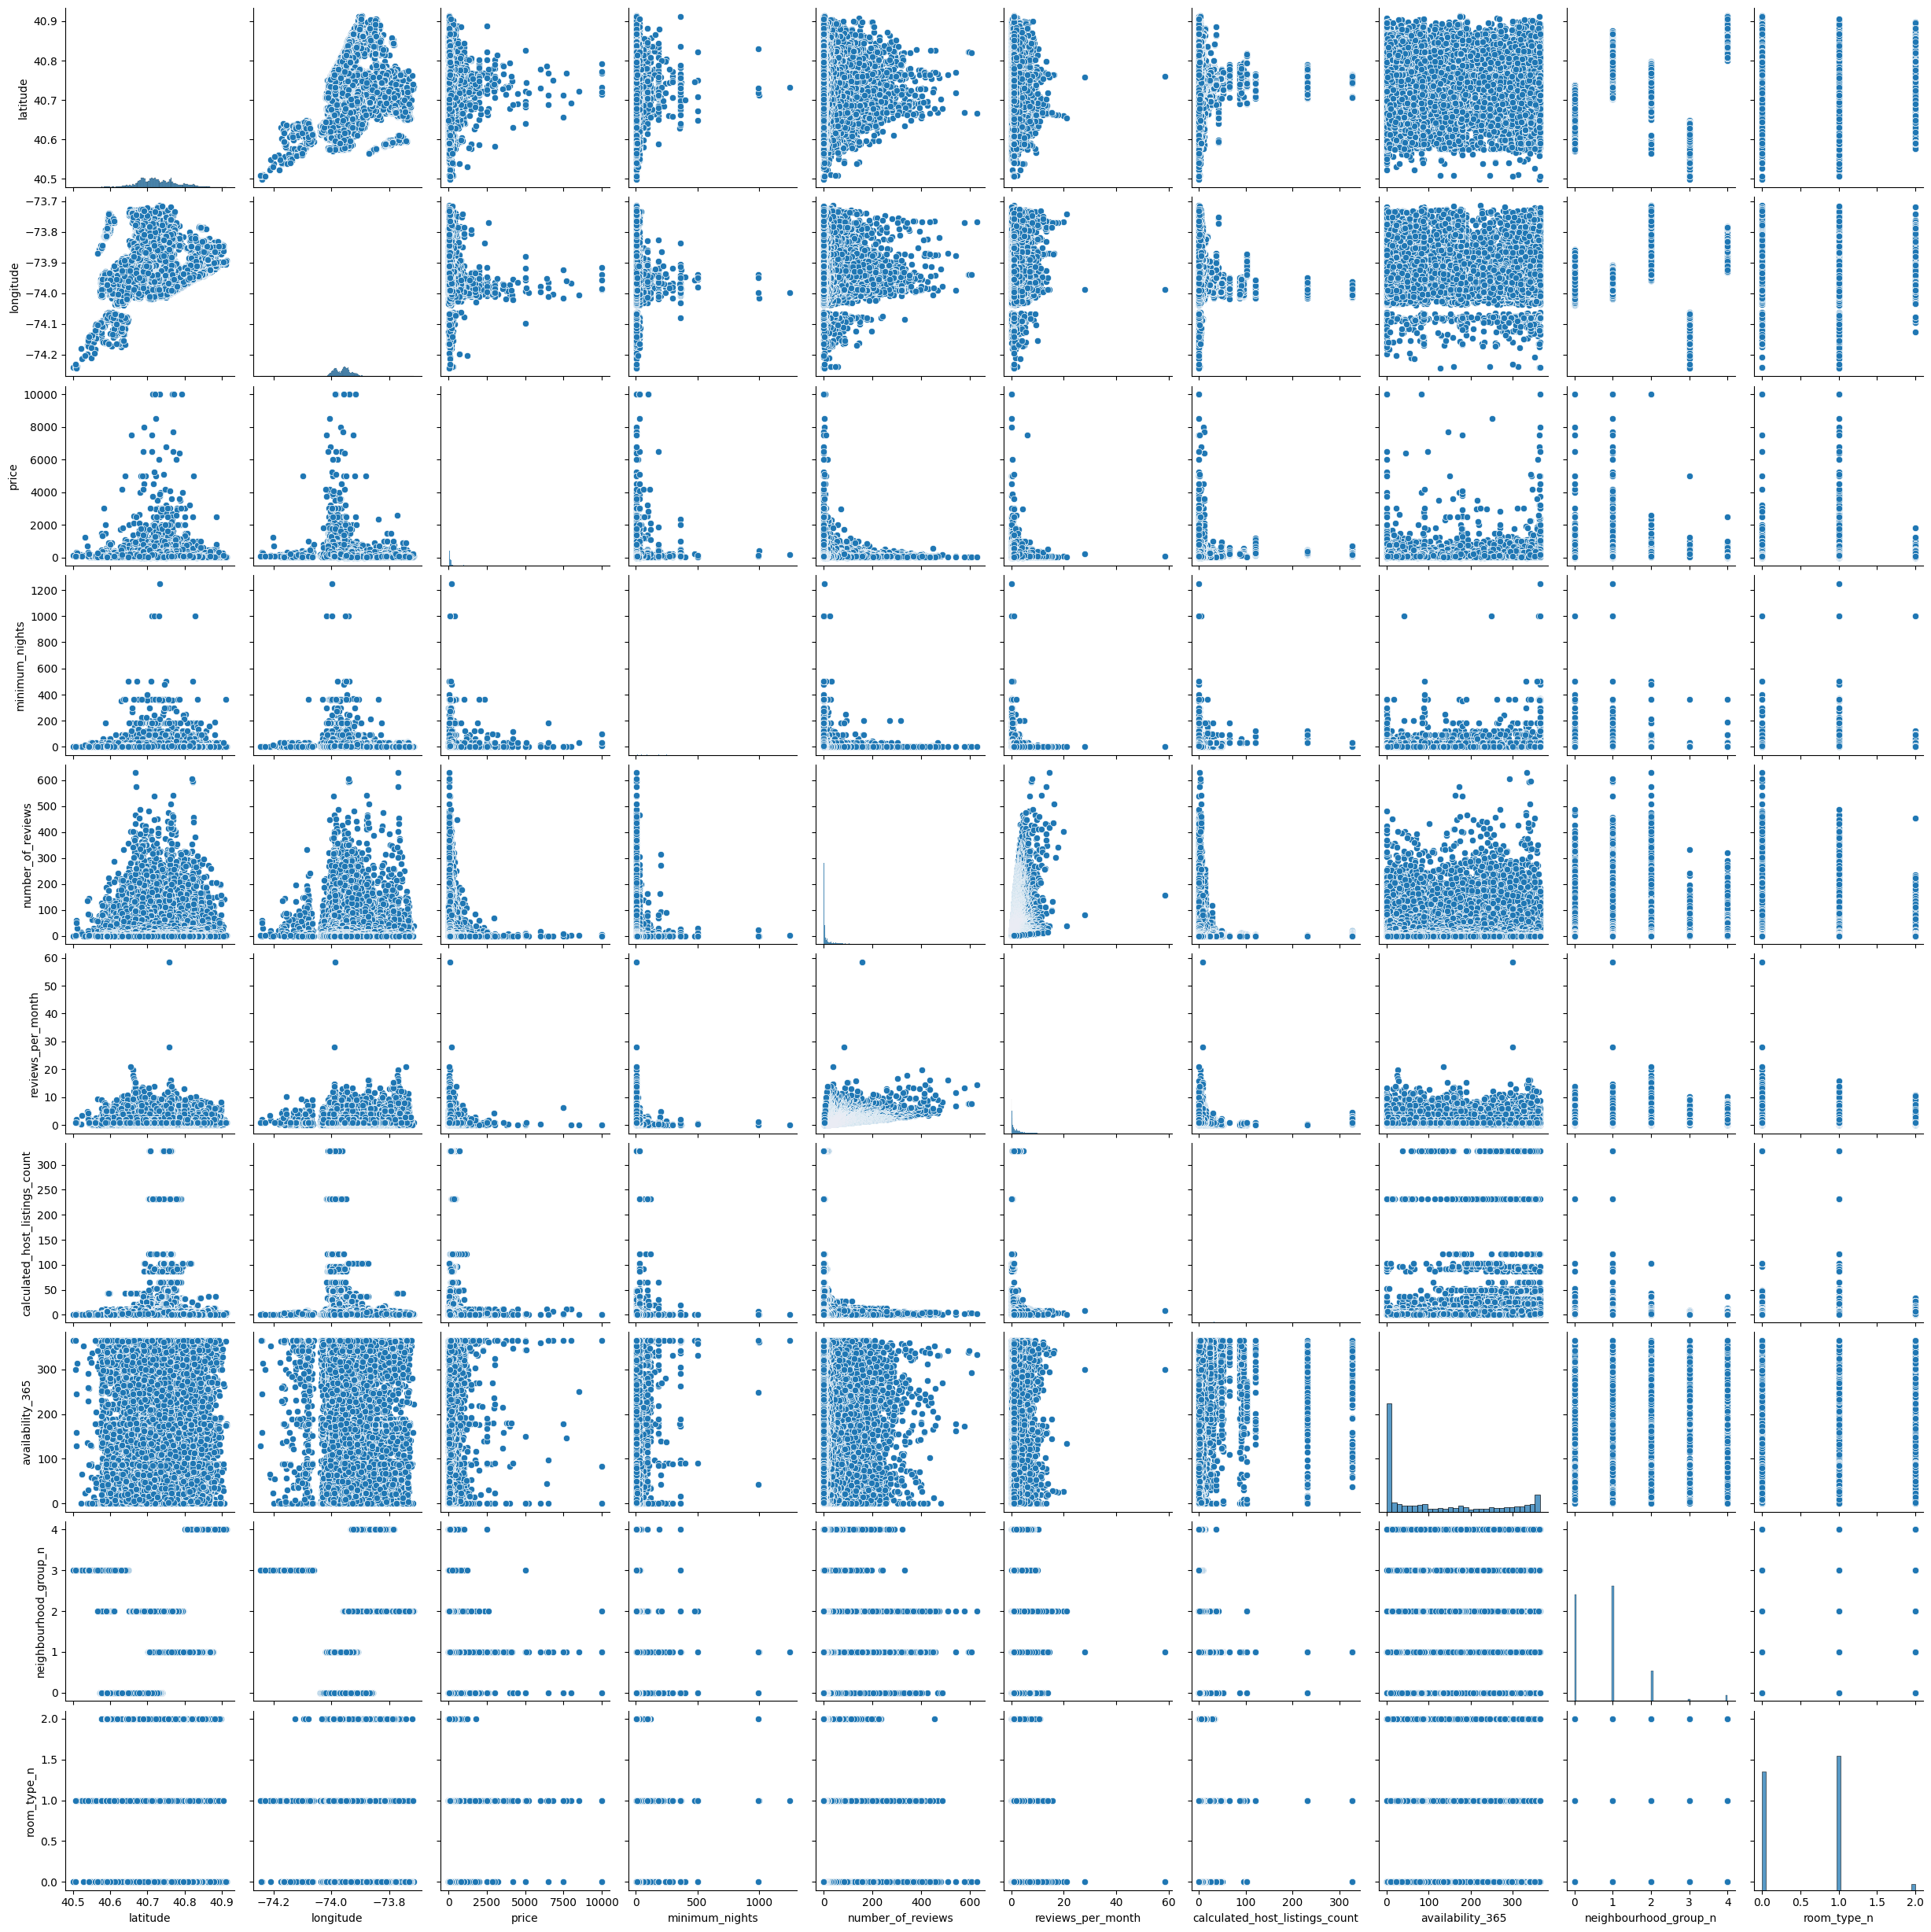

In [17]:
sns.pairplot(data = total_data)

In [18]:

FINAL_COLS = [ "neighbourhood_group_n", "latitude", "longitude", "room_type_n", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365" ]
total_data = total_data[FINAL_COLS]

total_data.describe()

,neighbourhood_group_n,latitude,longitude,room_type_n,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


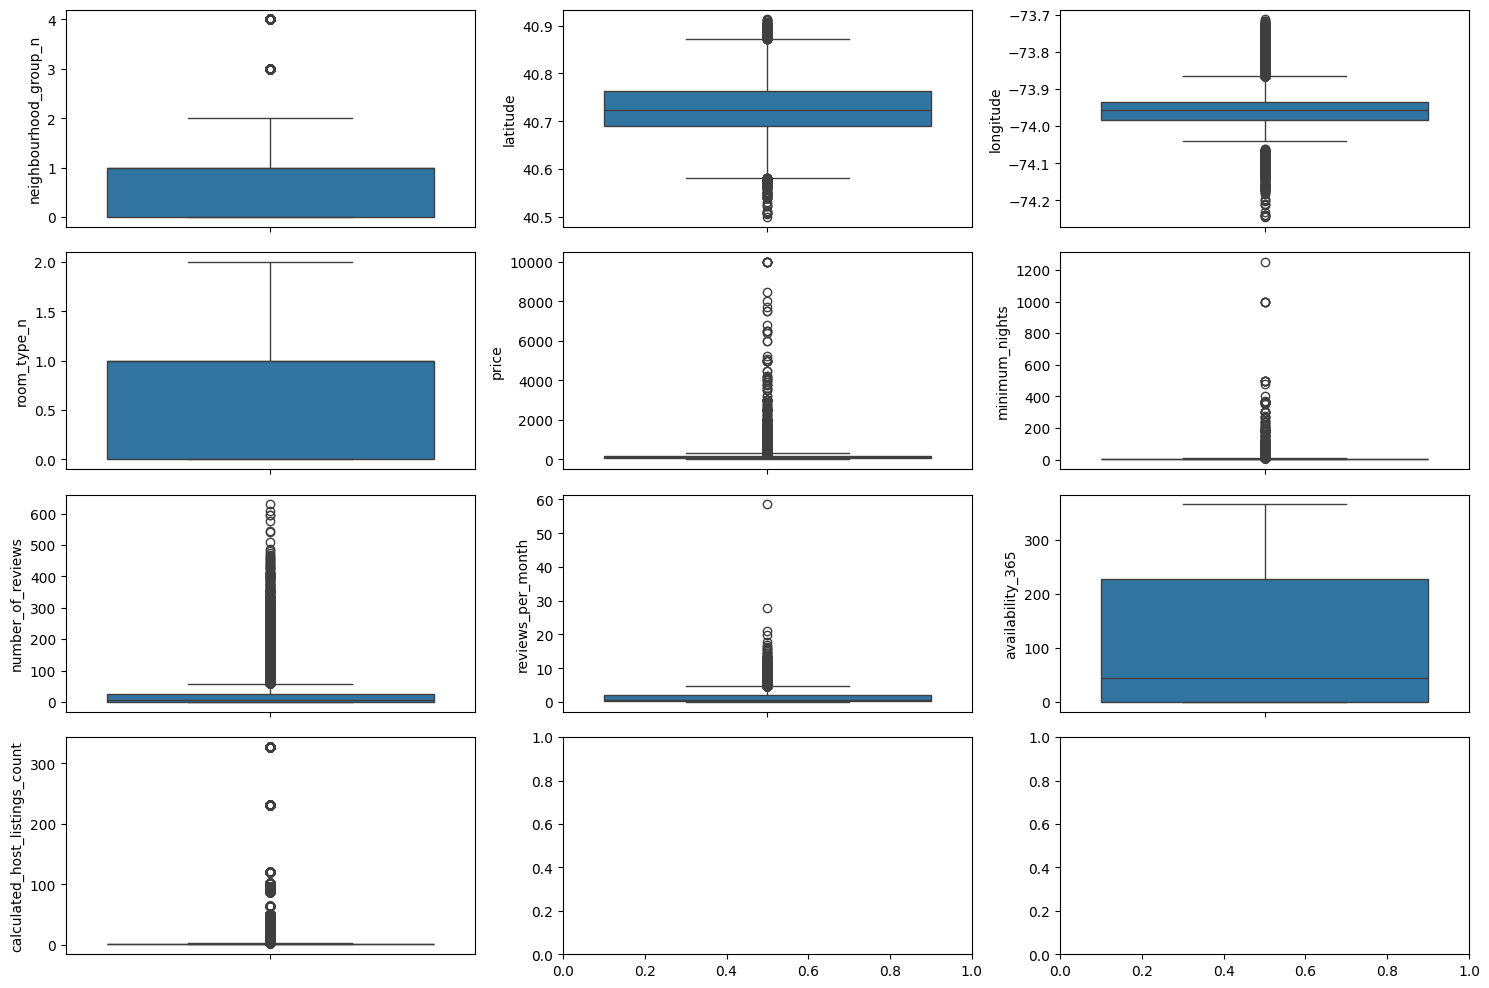

In [19]:
fig, axis = plt.subplots(4, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=total_data, y="neighbourhood_group_n")
sns.boxplot(ax=axis[0, 1], data=total_data, y="latitude")
sns.boxplot(ax=axis[0, 2], data=total_data, y="longitude")
sns.boxplot(ax=axis[1, 0], data=total_data, y="room_type_n")
sns.boxplot(ax=axis[1, 1], data=total_data, y="price")
sns.boxplot(ax=axis[1, 2], data=total_data, y="minimum_nights")
sns.boxplot(ax=axis[2, 0], data=total_data, y="number_of_reviews")
sns.boxplot(ax=axis[2, 1], data=total_data, y="reviews_per_month")
sns.boxplot(ax=axis[2, 2], data=total_data, y="availability_365")
sns.boxplot(ax=axis[3, 0], data=total_data, y= "calculated_host_listings_count")
plt.tight_layout()
plt.show()

En estos graficos puedo identificar cuales son los valores con outliers (price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count).
Deberíamos establecer algunos límites superior e inferior para determinar si un punto de datos debe considerarse o no un valor atípico.


In [20]:
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Price es la variable objetivo, quiero conocer cuales son los outliers.

In [21]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [22]:
total_data[total_data["price"] > 9000]

,neighbourhood_group_n,latitude,longitude,room_type_n,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6530,1,40.79264,-73.93898,1,9999,5,1,0.02,1,0
9151,2,40.76810,-73.91651,0,10000,100,2,0.04,1,0
12342,1,40.71355,-73.98507,0,9999,99,6,0.14,1,83
17692,0,40.73260,-73.95739,1,10000,5,5,0.16,1,0
29238,1,40.77213,-73.98665,1,10000,30,0,NaN,1,83
40433,1,40.71980,-73.98566,1,9999,30,0,NaN,1,365


total_data_CON_outliers["minimum_nights"] = total_data["minimum_nights"].fillna(total_data["minimum_nights"].median()) # Cuando una variable es entera pero numérica/incontable
total_data_CON_outliers["number_of_reviews"] = total_data["number_of_reviews"].fillna(total_data["number_of_reviews"].median())

# total_data_CON_outliers["Embarked_n"] = total_data["Embarked_n"].fillna(total_data["Embarked_n"].mode()[0]) # Cuando una variable es categórica

total_data_CON_outliers["reviews_per_month"] = total_data["reviews_per_month"].fillna(total_data["Freviews_per_month"].mean()) # Cuando una variable es puramente decimal

total_data_CON_outliers.isnull().sum() 

In [23]:
from numpy._core.defchararray import upper
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ES DECIR:
total_data_CON_outliers = total_data.copy()
total_data_SIN_outliers = total_data.copy() # Lo vamos a modificar. Para cada variable con outliers, reemplazamos sus valores outliers

outliers_cols = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]

def replace_outliers(column, df):
  col_stats = total_data[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Vamos a quitar los outliers superiores
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Vamos a quitar los outliers inferiores
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in outliers_cols:
  total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
  outliers_dict.update({column: limits})

outliers_dict # Este JSON me lo tengo que GUARDAR

{'minimum_nights': [1, 11.0],
 'number_of_reviews': [0, 58.5],
 'reviews_per_month': [0.01, 4.77],
 'calculated_host_listings_count': [1, 3.5]}

In [24]:
with open("./outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)
  #Aqui guarmos el json

In [25]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
neighbourhood_group_n                 0
latitude                              0
longitude                             0
price                                 0
room_type_n                           0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [26]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group_n             0
latitude                          0
longitude                         0
room_type_n                       0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
total_data_CON_outliers["minimum_nights"] = total_data["minimum_nights"].fillna(total_data["minimum_nights"].median()) # Cuando una variable es entera pero numérica/incontable
total_data_CON_outliers["number_of_reviews"] = total_data["number_of_reviews"].fillna(total_data["number_of_reviews"].median())
total_data_CON_outliers["reviews_per_month"] = total_data["reviews_per_month"].fillna(total_data["reviews_per_month"].mean()) # Cuando una variable es puramente decimal
total_data_CON_outliers.isnull().sum() 

neighbourhood_group_n             0
latitude                          0
longitude                         0
room_type_n                       0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Podemos ver que no existen faltantes.

In [28]:
total_data_CON_outliers["FamMembers"] = total_data_CON_outliers["minimum_nights"] + total_data_CON_outliers["number_of_reviews"]
total_data_SIN_outliers["FamMembers"] = total_data_SIN_outliers["minimum_nights"] + total_data_SIN_outliers["number_of_reviews"]

total_data_SIN_outliers.head()

,neighbourhood_group_n,latitude,longitude,room_type_n,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,FamMembers
0,0,40.64749,-73.97237,0,149,1.0,9.0,0.21,3.5,365,10.0
1,1,40.75362,-73.98377,1,225,1.0,45.0,0.38,2.0,355,46.0
2,1,40.80902,-73.94190,0,150,3.0,0.0,4.77,1.0,365,3.0
3,0,40.68514,-73.95976,1,89,1.0,58.5,4.64,1.0,194,59.5
4,1,40.79851,-73.94399,1,80,10.0,9.0,0.10,1.0,0,19.0


In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
import pandas as pd

# Variables predictoras (X) y variable objetivo (y)
X = total_data_CON_outliers.drop(columns=["price"])
y = total_data_CON_outliers["price"]

# Simulamos train / test (si ya los tienes, este bloque no hace falta)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de selección: nos quedamos con las 5 mejores variables
selection_model = SelectKBest(score_func=f_classif, k=5)

# Ajustamos el modelo SOLO con los datos de entrenamiento
selection_model.fit(X_train, y_train)

# Máscara booleana de las columnas seleccionadas
ix = selection_model.get_support()

# Creamos nuevos DataFrames con solo las variables seleccionadas
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix], index=X_train.index)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[ix], index=X_test.index)

# Ver resultado
X_train_sel.head()

,longitude,room_type_n,minimum_nights,calculated_host_listings_count,availability_365
32645,-73.95530,1.0,3.0,1.0,1.0
23615,-73.94048,0.0,2.0,1.0,0.0
31183,-73.95947,0.0,2.0,2.0,0.0
29260,-73.93118,1.0,3.0,1.0,267.0
7275,-73.89564,0.0,5.0,1.0,0.0
